## Installing Python Packages from a Jupyter Notebook
https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

### Site-packages directory

In [1]:
%conda info


     active environment : base
    active env location : D:\Administrator\Anaconda3
            shell level : 1
       user config file : C:\Users\Administrator\.condarc
 populated config files : 
          conda version : 4.7.12
    conda-build version : 3.18.9
         python version : 3.7.4.final.0
       virtual packages : 
       base environment : D:\Administrator\Anaconda3  (writable)
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
          package cache : D:\Administrator\Anaconda3\pkgs
                          C:\Users\Administrator\.conda\pkgs
                          C:\Users\Administrator\AppData\Local\conda\conda\

In [2]:
%conda list --show-channel-urls

# packages in environment at D:\Administrator\Anaconda3:
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0    defaults
alabaster                 0.7.12                   py37_0    defaults
anaconda                  2019.10                  py37_0    defaults
anaconda-client           1.7.2                    py37_0    defaults
anaconda-navigator        1.9.7                    py37_0    defaults
anaconda-project          0.8.3                      py_0    defaults
asn1crypto                1.0.1                    py37_0    defaults
astroid                   2.3.1                    py37_0    defaults
astropy                   3.2.1            py37he774522_0    defaults
atomicwrites              1.3.0                    py37_1    defaults
attrs                     19.2.0                     py_0    defaults
babel                     2.7.0                      py_0    defaults
backcall                  0.1.0   

In [10]:
import sys
sys.path

['D:\\Ting File\\自我進修\\Ting_AIlearnig\\機器學習100天\\GitHub_ML100-Days\\ML100-Days\\Review',
 'D:\\Administrator\\Anaconda3\\python37.zip',
 'D:\\Administrator\\Anaconda3\\DLLs',
 'D:\\Administrator\\Anaconda3\\lib',
 'D:\\Administrator\\Anaconda3',
 '',
 'D:\\Administrator\\Anaconda3\\lib\\site-packages',
 'D:\\Administrator\\Anaconda3\\lib\\site-packages\\win32',
 'D:\\Administrator\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'D:\\Administrator\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'D:\\Administrator\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Administrator\\.ipython']

In [3]:
!python -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/00/b6/9cfa56b4081ad13874b0c6f96af8ce16cfbc1cb06bedf8e9164ce5551ec1/pip-19.3.1-py2.py3-none-any.whl
  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


In [6]:
# py-xgboost in anaconda   :     https://anaconda.org/anaconda/py-xgboost 
!python -m pip install xgboost

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import xgboost as xgb
import seaborn as sns

In [81]:
data_path = 'data/insiderpayData/'
train_data = pd.read_csv(data_path+"train_data.csv")
test_data = pd.read_csv(data_path+"test_features.csv")

In [82]:
print(test_data.shape)
test_data.columns

(33, 21)


Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')

In [83]:
train_data.columns

Index(['name', 'bonus', 'deferral_payments', 'deferred_income',
       'director_fees', 'email_address', 'exercised_stock_options', 'expenses',
       'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi',
       'loan_advances', 'long_term_incentive', 'other', 'poi',
       'restricted_stock', 'restricted_stock_deferred', 'salary',
       'shared_receipt_with_poi', 'to_messages', 'total_payments',
       'total_stock_value'],
      dtype='object')

In [84]:
train_data.head()
print(train_data.shape)

(113, 22)


In [85]:
# 觀察資料後發現一個看起來不像人名，另一個則是全都是 NAN
train_data =  train_data[(train_data['name'] != "THE TRAVEL AGENCY IN THE PARK") & (train_data['name'] != "LOCKHART EUGENE E")]

In [86]:
train_data.shape

(111, 22)

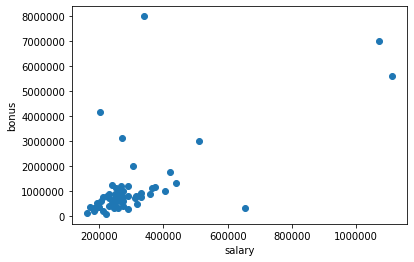

In [87]:
# Scatter plot for salary & bonus, 看起來左上跟右下有兩個 outlier
plt.scatter(train_data['salary'] , train_data['bonus'])
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [88]:
train_data[(train_data['bonus'] == 8000000)]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
33,LAVORATO JOHN J,8000000.0,NaN,NaN,NaN,john.lavorato@enron.com,4158995.0,49537.0,2585.0,528.0,...,2035380.0,1552.0,False,1008149.0,NaN,339288.0,3962.0,7259.0,10425757.0,5167144.0


In [89]:
train_data[(train_data['bonus'] <1000000) & (train_data['salary'] > 600000)]

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
110,PICKERING MARK R,300000.0,NaN,NaN,NaN,mark.pickering@enron.com,28798.0,31653.0,67.0,7.0,...,NaN,NaN,False,NaN,NaN,655037.0,728.0,898.0,1386690.0,28798.0


In [90]:
# 刪除 outlier
train_data =  train_data[(train_data['name'] != "PICKERING MARK R") & (train_data['name'] != "LAVORATO JOHN J")]

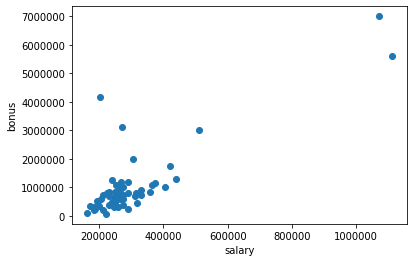

In [91]:
plt.scatter(train_data['salary'] , train_data['bonus'])
plt.xlabel("salary")
plt.ylabel("bonus")
plt.show()

In [92]:
train_data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,5.900000e+01,2.800000e+01,3.400000e+01,13.000000,7.900000e+01,71.000000,63.000000,63.000000,63.000000,1.0,4.800000e+01,6.700000e+01,8.100000e+01,10.000000,7.100000e+01,63.000000,63.000000,9.300000e+01,9.600000e+01
mean,1.045655e+06,6.344374e+05,-4.625664e+05,89397.846154,3.007642e+06,51334.788732,691.809524,58.365079,34.841270,81525000.0,7.667262e+05,4.550984e+05,1.298394e+06,-221885.700000,2.676135e+05,1072.206349,2095.031746,2.543648e+06,3.546493e+06
std,1.229302e+06,8.603646e+05,8.095392e+05,41143.391399,6.069945e+06,48214.949360,2092.524250,71.795251,76.717371,NaN,9.428988e+05,1.360570e+06,2.513694e+06,205191.374121,1.677330e+05,1126.082320,2776.910298,1.070286e+07,7.247355e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,81525000.0,7.102300e+04,2.000000e+00,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.750000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.066780e+05,17674.000000,19.000000,10.000000,0.000000,81525000.0,2.750000e+05,9.595000e+02,2.640130e+05,-389621.750000,2.040380e+05,152.500000,510.500000,2.497870e+05,4.282172e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,44.000000,28.000000,7.000000,81525000.0,3.987310e+05,5.238200e+04,4.623840e+05,-139856.500000,2.501000e+05,589.000000,1088.000000,1.101393e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.117739e+06,61483.000000,180.500000,81.000000,26.000000,81525000.0,8.142118e+05,3.653800e+05,9.567750e+05,-77953.250000,2.885500e+05,1874.500000,2648.000000,1.979596e+06,2.493616e+06
max,7.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,305.000000,387.000000,81525000.0,5.145434e+06,1.035973e+07,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [93]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 0 to 112
Data columns (total 22 columns):
name                         109 non-null object
bonus                        59 non-null float64
deferral_payments            28 non-null float64
deferred_income              34 non-null float64
director_fees                13 non-null float64
email_address                81 non-null object
exercised_stock_options      79 non-null float64
expenses                     71 non-null float64
from_messages                63 non-null float64
from_poi_to_this_person      63 non-null float64
from_this_person_to_poi      63 non-null float64
loan_advances                1 non-null float64
long_term_incentive          48 non-null float64
other                        67 non-null float64
poi                          109 non-null bool
restricted_stock             81 non-null float64
restricted_stock_deferred    10 non-null float64
salary                       71 non-null float64
shared_receipt_wi

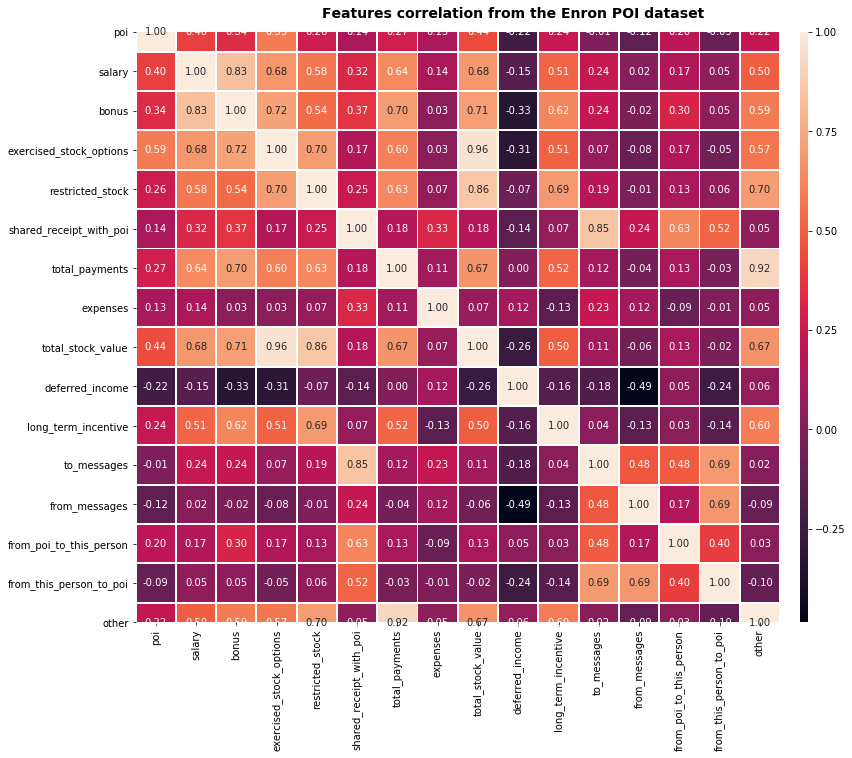

In [94]:
#排除 "name", "email_address" 欄位
allFeatures = ['poi','salary','bonus', 'exercised_stock_options', 'restricted_stock', 'shared_receipt_with_poi',
               'total_payments', 'expenses', 'total_stock_value', 'deferred_income', 'long_term_incentive',
               'to_messages', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'other']

train_data = train_data[allFeatures]
test_data = test_data[allFeatures[1:]]

correlationDataframe = train_data.corr()

# Drawing a heatmap with the numeric values in each cell
fig1, ax = plt.subplots(figsize=(14,10))
fig1.subplots_adjust(top=.945)
plt.suptitle('Features correlation from the Enron POI dataset', fontsize=14, fontweight='bold')

cbar_kws = {'orientation':"vertical", 'pad':0.025, 'aspect':70}
sns.heatmap(correlationDataframe, annot=True, fmt='.2f', linewidths=.9, ax=ax, cbar_kws=cbar_kws)

## 新增傳送/收到 poi 信件 的比例 features

In [95]:
train_data['portion_from_poi'] = train_data['from_poi_to_this_person'] / train_data['from_messages']
train_data['portion_to_poi'] = train_data['from_this_person_to_poi'] / train_data['to_messages']

train_data['portion_from_poi'] = train_data['portion_from_poi'].fillna(0)
train_data['portion_to_poi'] = train_data['portion_to_poi'].fillna(0)

In [96]:
test_data['portion_from_poi'] = test_data['from_poi_to_this_person'] / test_data['from_messages']
test_data['portion_to_poi'] = test_data['from_this_person_to_poi'] / test_data['to_messages']

test_data['portion_from_poi'] = test_data['portion_from_poi'].fillna(0)
test_data['portion_to_poi'] = test_data['portion_to_poi'].fillna(0)

In [97]:
train_data['ratio_exercised_restricted'] = train_data['exercised_stock_options'] / train_data['restricted_stock'] 
test_data['ratio_exercised_restricted'] = test_data['exercised_stock_options'] / test_data['restricted_stock'] 

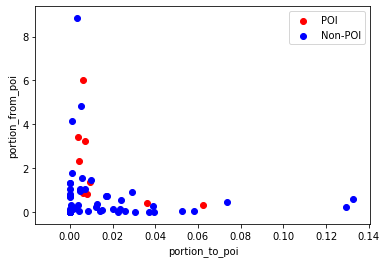

In [98]:
is_poi = (True, False)
colors = ('r', "b")
groups = ("POI", "Non-POI")
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for poi, color, group in zip(is_poi, colors, groups):
    data_plot = train_data[train_data['poi'] == poi]
    ax.scatter(data_plot['portion_to_poi'], data_plot['portion_from_poi'], c=color, label=group)
plt.xlabel("portion_to_poi")
plt.ylabel("portion_from_poi")
plt.legend(loc=1)
plt.show()

## 建立 X_train, y_train 資料

In [99]:
#x_train = train_data.drop(["name", 'poi', "email_address"], axis=1)
x_train = train_data.drop(['poi'], axis=1)
y_train = train_data['poi']

In [100]:
x_train = x_train.fillna(0)   # 用 0 填補遺失職

## 訓練模型

In [101]:
#"未"調整最佳參數
# 建立模型
clf = xgb.XGBClassifier()
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [102]:
#"未"調整最佳參數 的結果
y_pred_prob = clf.predict_proba(x_train)[:,1]
y_pred = clf.predict(x_train)

print("TRAINING AUC: ", roc_auc_score(y_train, y_pred_prob)) 
print("TRAINING F1-Score: ",  metrics.f1_score(y_train, y_pred)) # 使用 F1-Score 評估
print("TRAINING Precision: ", metrics.precision_score(y_train, y_pred))# 使用 Precision 評估
print("TRAINING Recall: ", metrics.recall_score(y_train, y_pred))# 使用 recall 評估

TRAINING AUC:  1.0
TRAINING F1-Score:  1.0
TRAINING Precision:  1.0
TRAINING Recall:  1.0


In [103]:
#調整最佳參數
n_estimators = [600, 800, 1000]
max_depth = [2, 4, 6]
scale_pos_weight = [0.4, 1, 1.5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, scale_pos_weight=scale_pos_weight)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=1 )

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

D:\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    3.6s finished
D:\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [104]:
grid_result.best_params_

{'max_depth': 2, 'n_estimators': 600, 'scale_pos_weight': 0.4}

In [105]:
# # 使用最佳參數重新建立模型
clf_bestparam = xgb.XGBClassifier(max_depth=grid_result.best_params_['max_depth'],
                                  n_estimators=grid_result.best_params_['n_estimators'],
                                  scale_pos_weight=grid_result.best_params_['scale_pos_weight'])

# 訓練模型
clf_bestparam.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=600, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.4, seed=None,
              silent=None, subsample=1, verbosity=1)

In [106]:
#"已"調整最佳參數 的結果
y_pred_prob = clf_bestparam.predict_proba(x_train)[:,1]
y_pred = clf_bestparam.predict(x_train)

print("TRAINING AUC: ", roc_auc_score(y_train, y_pred_prob)) 
print("TRAINING F1-Score: ",  metrics.f1_score(y_train, y_pred)) # 使用 F1-Score 評估
print("TRAINING Precision: ", metrics.precision_score(y_train, y_pred))# 使用 Precision 評估
print("TRAINING Recall: ", metrics.recall_score(y_train, y_pred))# 使用 recall 評估

TRAINING AUC:  1.0
TRAINING F1-Score:  0.9600000000000001
TRAINING Precision:  1.0
TRAINING Recall:  0.9230769230769231


### 檢察test答案

In [116]:
#匯入正確答案 對解答
y_test = pd.read_csv(data_path + "test_label.csv")['poi']

In [117]:
#選取 drop變項
#x_test = test_data.drop(['name','email_address'], axis=1)
x_test = test_data.fillna(0)
print(x_test.shape)

(33, 18)


In [118]:
#"未"調整最佳參數 的結果
y_pred_prob = clf.predict_proba(x_test)[:,1]
y_pred = clf.predict(x_test)

print("TESTING AUC: ", roc_auc_score(y_test, y_pred_prob)) 
print("TESTING F1-Score: ",  metrics.f1_score(y_test, y_pred)) # 使用 F1-Score 評估
print("TESTING Precision: ", metrics.precision_score(y_test, y_pred))# 使用 Precision 評估
print("TESTING Recall: ", metrics.recall_score(y_test, y_pred))# 使用 recall 評估

TESTING AUC:  0.8785714285714286
TESTING F1-Score:  0.5714285714285714
TESTING Precision:  0.4444444444444444
TESTING Recall:  0.8


In [119]:
#"已"調整最佳參數 的結果
y_pred_prob = clf_bestparam.predict_proba(x_test)[:,1]
y_pred = clf_bestparam.predict(x_test)

print("TESTING AUC: ", roc_auc_score(y_test, y_pred_prob)) 
print("TESTING F1-Score: ",  metrics.f1_score(y_test, y_pred)) # 使用 F1-Score 評估
print("TESTING Precision: ", metrics.precision_score(y_test, y_pred))# 使用 Precision 評估
print("TESTING Recall: ", metrics.recall_score(y_test, y_pred))# 使用 recall 評估

TESTING AUC:  0.8714285714285713
TESTING F1-Score:  0.6666666666666666
TESTING Precision:  0.5714285714285714
TESTING Recall:  0.8


In [120]:
#儲存分析結果，上傳Kaggle，求得真正的預測能力
#myDataFrame = pd.DataFrame(y_pred_prob,columns=['poi'],dtype='float64')
#index_column = np.arange(1,33)
#myDataFrame['name'] = test['name']
#myDataFrame.to_csv('Submission_.csv', index=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text yticklabel objects>)

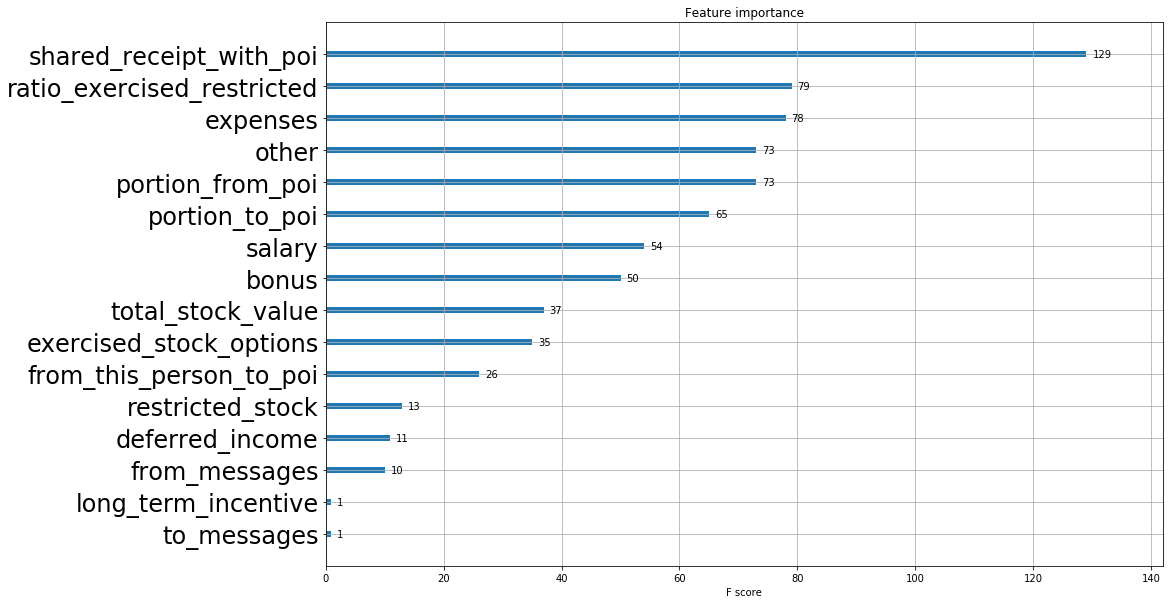

In [121]:
fig, ax = plt.subplots(figsize=(15, 10))
xgb.plot_importance(clf_bestparam, ax=ax, ylabel=None)
plt.yticks(size=24)